<hr style="border: 1px solid black; width: 100%; margin-left: 0">


<div style="text-align:right"> <b>University of Padua - Department of Physics and Astronomy<b> </div> 
<div style="text-align:right"> <strong> Degree course: </strong> Physics of Data</div>
<div style="text-align:right"><strong>Course: </strong>Modern Computing for Physics<b> </div>
<div style="text-align:right"><strong>Year: </strong>2024-2025<b> </div>
    

**Student**:
- Bertinelli Gabriele - 2103359 - gabriele.bertinelli@studenti.unipd.it
    
<strong>Exam Date</strong>: March, 10th 2025
    
<center>
    
# N-body simulator - Parallelized with CUDA
<center>
<hr style="border: 1px solid black; width: 100%; margin-left: 0">   

<u>This notebook is just to show the codes used to produce the plots. Explanation of the project and comments to the results can be found in the final report pdf.</u>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.pyplot import cm
from PIL import Image
%matplotlib inline

# 6 BODIES SYSTEM EVOLUTION

### Energy

In [2]:
energy_df = pd.read_csv('../../parallel_energy.csv')

In [3]:
en_0 = energy_df['e_tot'][0]

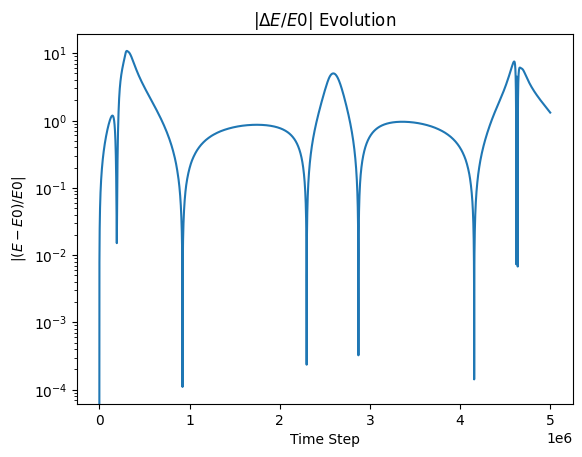

In [4]:
plt.plot(energy_df['t_step'], np.abs((energy_df['e_tot'] - en_0)/en_0))
plt.xlabel('Time Step')
plt.ylabel(r'$|(E-E0)/E0|$')
plt.title(r'$|\Delta E /E0|$ Evolution')
plt.yscale('log')

### Positions

In [5]:
pos_df = pd.read_csv('../../parallel_output.csv')

In [6]:
N = pos_df['ID'].max()+1

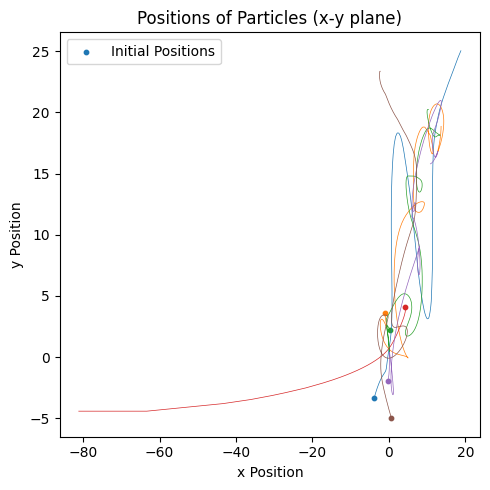

In [7]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

for i in range(N):
    ax.plot(pos_df[pos_df['ID']==i]['pos_x'], pos_df[pos_df['ID']==i]['pos_y'], linewidth=0.5)
    ax.scatter(pos_df[pos_df['ID']==i]['pos_x'].iloc[0], pos_df[pos_df['ID']==i]['pos_y'].iloc[0], s=10, label='Initial Positions' if i==0 else None)

# ax.set_xlim(-10,10)
# ax.set_ylim(-10,10)
plt.title('Positions of Particles (x-y plane)')
plt.xlabel('x Position')
plt.ylabel('y Position')
plt.legend()
plt.tight_layout()
plt.show()

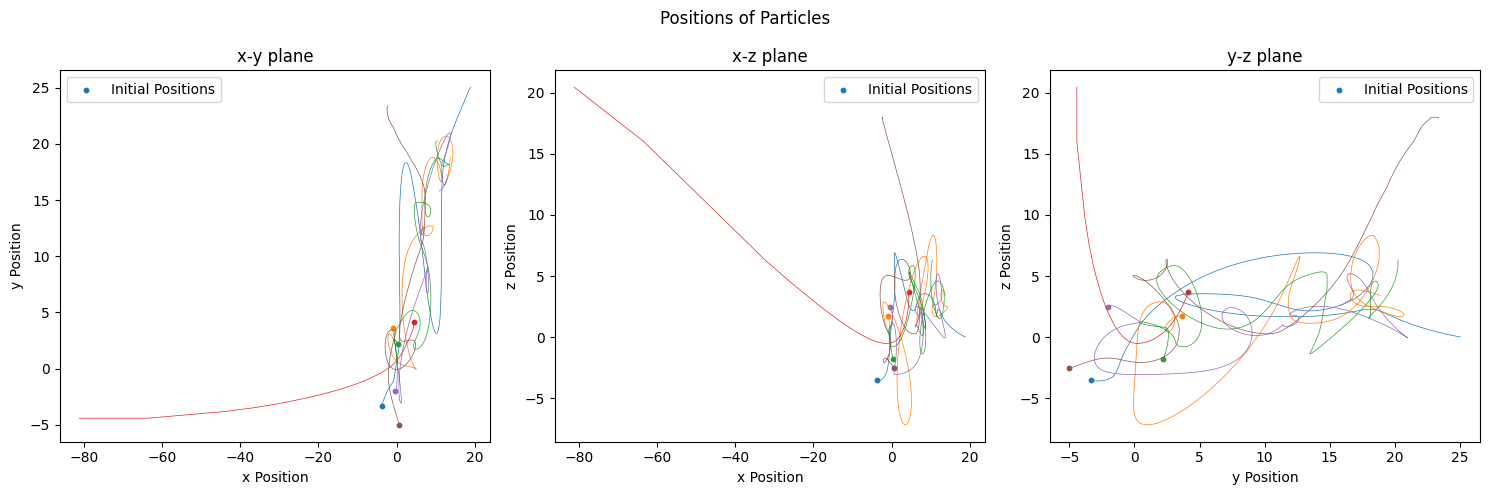

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i in range(N):
    ax[0].plot(pos_df[pos_df['ID']==i]['pos_x'], pos_df[pos_df['ID']==i]['pos_y'], linewidth=0.5)
    ax[0].scatter(pos_df[pos_df['ID']==i]['pos_x'].iloc[0], pos_df[pos_df['ID']==i]['pos_y'].iloc[0], s=10, label='Initial Positions' if i==0 else None)
    ax[0].set_xlabel('x Position')
    ax[0].set_ylabel('y Position')
    ax[0].set_title('x-y plane')
    ax[0].legend()

    ax[1].plot(pos_df[pos_df['ID']==i]['pos_x'], pos_df[pos_df['ID']==i]['pos_z'], linewidth=0.5)
    ax[1].scatter(pos_df[pos_df['ID']==i]['pos_x'].iloc[0], pos_df[pos_df['ID']==i]['pos_z'].iloc[0], s=10, label='Initial Positions' if i==0 else None)
    ax[1].set_xlabel('x Position')
    ax[1].set_ylabel('z Position')
    ax[1].set_title('x-z plane')
    ax[1].legend()

    ax[2].plot(pos_df[pos_df['ID']==i]['pos_y'], pos_df[pos_df['ID']==i]['pos_z'], linewidth=0.5)
    ax[2].scatter(pos_df[pos_df['ID']==i]['pos_y'].iloc[0], pos_df[pos_df['ID']==i]['pos_z'].iloc[0], s=10, label='Initial Positions' if i==0 else None)
    ax[2].set_xlabel('y Position')
    ax[2].set_ylabel('z Position')
    ax[2].set_title('y-z plane')
    ax[2].legend()



# ax.set_xlim(-10,10)
# ax.set_ylim(-10,10)
plt.suptitle('Positions of Particles')

plt.tight_layout()
plt.show()

<!-- vel_df = pd.read_csv('../../velocity_output.csv') -->

<!-- position1 = pos_df[['pos_x', 'pos_y', 'pos_z']].where(pos_df['ID']==0).dropna().T
velocity1 = vel_df[['vel_x', 'vel_y', 'vel_z']].where(vel_df['ID']==0).dropna().T
mass1 = pos_df['mass'].where(pos_df['ID']==0).dropna()

position2 = pos_df[['pos_x', 'pos_y', 'pos_z']].where(pos_df['ID']==1).dropna().T
velocity2 = vel_df[['vel_x', 'vel_y', 'vel_z']].where(vel_df['ID']==1).dropna().T
mass2 = pos_df['mass'].where(pos_df['ID']==1).dropna()

position3 = pos_df[['pos_x', 'pos_y', 'pos_z']].where(pos_df['ID']==2).dropna().T
velocity3 = vel_df[['vel_x', 'vel_y', 'vel_z']].where(vel_df['ID']==2).dropna().T
mass3 = pos_df['mass'].where(pos_df['ID']==2).dropna()

position4 = pos_df[['pos_x', 'pos_y', 'pos_z']].where(pos_df['ID']==3).dropna().T
velocity4 = vel_df[['vel_x', 'vel_y', 'vel_z']].where(vel_df['ID']==3).dropna().T
mass4 = pos_df['mass'].where(pos_df['ID']==3).dropna()

position5 = pos_df[['pos_x', 'pos_y', 'pos_z']].where(pos_df['ID']==4).dropna().T
velocity5 = vel_df[['vel_x', 'vel_y', 'vel_z']].where(vel_df['ID']==4).dropna().T
mass5 = pos_df['mass'].where(pos_df['ID']==4).dropna()

position6 = pos_df[['pos_x', 'pos_y', 'pos_z']].where(pos_df['ID']==5).dropna().T
velocity6 = vel_df[['vel_x', 'vel_y', 'vel_z']].where(vel_df['ID']==5).dropna().T
mass6 = pos_df['mass'].where(pos_df['ID']==5).dropna() -->

<!-- position = np.stack([position1, position2, position3, position4, position5, position6], axis=0)
velocity = np.stack([velocity1, velocity2, velocity3, velocity4, velocity5, velocity6], axis=0)
mass = np.stack([mass1, mass2, mass3, mass4, mass5, mass6], axis=0) -->

<!-- class Energy:
    
    def __init__(self, position, velocity, mass):
        """
        Class initialiser.
        It assigns the values to the class member pos, vel, mass and ID.
        ID is just a sequential integer number associated to each particle.

        :param position: A Nx3 numpy array containing the positions of the N particles
        :param velocity: A Nx3 numpy array containing the velocity of the N particles
        :param mass: A Nx1 numpy array containing the mass of the N particles
        """

        self.pos = np.array(np.atleast_2d(position), dtype=float)
        if self.pos.shape[1] != 3: print(f"Input position should contain a Nx3 array, current shape is {self.pos.shape}")

        self.vel = np.array(np.atleast_2d(velocity), dtype=float)
        if self.vel.shape[1] != 3: print(f"Input velocity should contain a Nx3 array, current shape is {self.pos.shape}")
        if len(self.vel) != len(self.pos): print(f"Position and velocity in input have not the same number of elements")

        self.mass = np.array(np.atleast_1d(mass), dtype=float)
        if len(self.mass) != len(self.pos): print(f"Position and mass in input have not the same number of elements")

        self.ID=np.arange(len(self.mass), dtype=int)

    def Ekin(self):
        Ekin = 0.5 * np.sum(self.mass * (np.sum(self.vel**2, axis=1)))

        return Ekin

    def Epot(self, softening: float = 0.):

        # Calculate all pairwise distances between bodies
        rij = np.linalg.norm(self.pos[:, np.newaxis, :] - self.pos, axis=2)
        
        # Exclude self-distances (diagonal elements) to avoid division by zero
        np.fill_diagonal(rij, 1.0)
        
        # Calculate potential energy using vectorized operations
        Epot_mat = - np.outer(self.mass, self.mass) / np.power((rij**2 + softening**2), 3/2)
        
        # Sum over all unique pairs
        Epot = np.sum(np.triu(Epot_mat, k=1))
        
        return Epot

    def Etot(self, softening: float = 0.):
        """
        Estimate the total  energy of the particles: Etot=Ekintot + Epottot

        :param softening: Softening parameter
        :return: a tuple with

            - Total energy
            - Total kinetic energy
            - Total potential energy
        """

        Ekin = self.Ekin()
        Epot = self.Epot(softening=softening)
        Etot = Ekin + Epot

        return Etot, Ekin, Epot -->


<!-- e_tot = np.zeros(50000)
for i in range(50000):
    pos = position[:,:,i]
    vel = velocity[:,:,i]
    mass = mass
    energy = Energy(pos, vel, mass)
    e_tot[i], _, _ = energy.Etot() -->

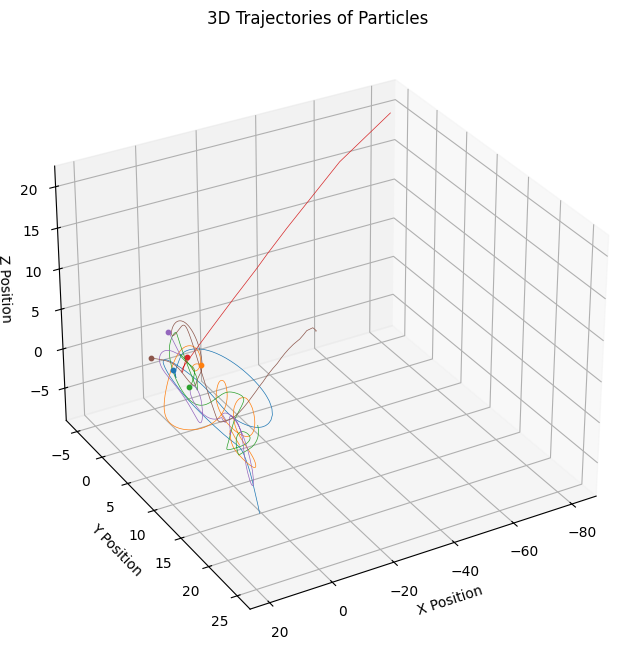

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure and axes
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot each object's trajectory in 3D
for i in range(N):
    trajectory = pos_df[pos_df['ID'] == i]
    ax.plot(
        trajectory['pos_x'], 
        trajectory['pos_y'], 
        trajectory['pos_z'], 
        linewidth=0.5
    )
    ax.scatter(
        trajectory['pos_x'].iloc[0], 
        trajectory['pos_y'].iloc[0], 
        trajectory['pos_z'].iloc[0], 
        s=10
    )

# Optional: Set axis labels
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

# Optional: Uncomment to set axis limits
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)
# ax.set_zlim(-10, 10)

# Improve 3D perspective
ax.view_init(elev=30, azim=60)
ax.set_title('3D Trajectories of Particles')

plt.show()

In [ ]:
# GIF

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
color = cm.rainbow(np.linspace(0, 1, N))

# Set axis limits based on previous plot
# ax.set_xlim(-100,50)
# ax.set_ylim(-100,100)

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    ax.set_xlim(-85, 25)
    ax.set_ylim(-10, 30)
    ax.set_zlim(-10, 25)
    ax.view_init(elev=30, azim=45)

    current_step = frame * 5000
    ax.set_title(f'3D Trajectories')

    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    
    for i, c in enumerate(color):

        ax.plot(pos_df[pos_df['ID']==i]['pos_x'], 
                pos_df[pos_df['ID']==i]['pos_y'], 
                pos_df[pos_df['ID']==i]['pos_z'],
                linewidth=0.5, alpha=0.5)

        current_data = pos_df[(pos_df['t_step'] == current_step) & (pos_df['ID'] == i)]
        ax.scatter(current_data['pos_x'], current_data['pos_y'], current_data['pos_z'], s=20, zorder=100)

# Create animation
max_steps = pos_df[pos_df['ID']==0]['t_step'].max()
frames = max_steps // 5000
ani = animation.FuncAnimation(fig, update, frames=frames, interval=25)

# Save as gif
ani.save('movement.gif', writer='pillow')
plt.close()

<img src="./pos_evolution_crop.gif">

# LOOP UNROLLING (p=256)

In [11]:
unroll_df = pd.read_csv('../data/loop_unrolling.csv')

In [12]:
u_1024 = unroll_df[unroll_df['n_bodies']==1024]
u_4096 = unroll_df[unroll_df['n_bodies']==4096]
u_16384 = unroll_df[unroll_df['n_bodies']==16384]
u_65536 = unroll_df[unroll_df['n_bodies']==65536]

uroll_data = [u_1024, u_4096, u_16384, u_65536]

In [13]:
uroll = [0,2,4,16,32]

u_1024_m = []
u_1024_s = []
u_4096_m = []
u_4096_s = []
u_16384_m = []
u_16384_s = []
u_65536_m = []
u_65536_s = []


for i in uroll:
    mmean = u_1024[u_1024['unroll']==i]['gflops'].mean()
    sstd = u_1024[u_1024['unroll']==i]['gflops'].std()
    u_1024_m.append(mmean)
    u_1024_s.append(sstd)

    mmean = u_4096[u_4096['unroll']==i]['gflops'].mean()
    sstd = u_4096[u_4096['unroll']==i]['gflops'].std()
    u_4096_m.append(mmean)
    u_4096_s.append(sstd)

    mmean = u_16384[u_16384['unroll']==i]['gflops'].mean()
    sstd = u_16384[u_16384['unroll']==i]['gflops'].std()
    u_16384_m.append(mmean)
    u_16384_s.append(sstd)

    mmean = u_65536[u_65536['unroll']==i]['gflops'].mean()
    sstd = u_65536[u_65536['unroll']==i]['gflops'].std()
    u_65536_m.append(mmean)
    u_65536_s.append(sstd)


u_mean = [u_1024_m, u_4096_m, u_16384_m, u_65536_m]
u_std = [u_1024_s, u_4096_s, u_16384_s, u_65536_s]

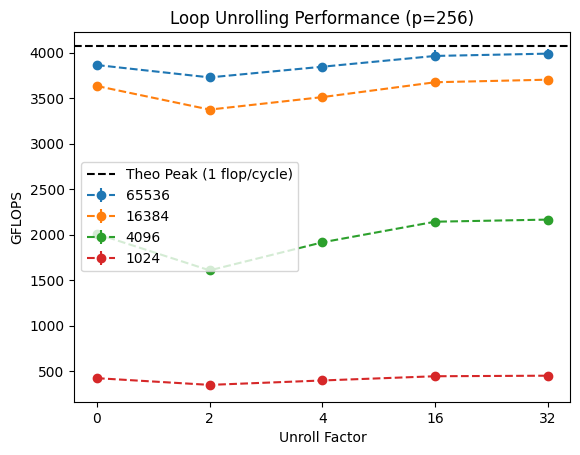

In [14]:
plt.errorbar(np.arange(5), u_65536_m, yerr=u_65536_s, label='65536', fmt='--o')
plt.errorbar(np.arange(5), u_16384_m, yerr=u_16384_s, label='16384', fmt='--o')
plt.errorbar(np.arange(5), u_4096_m, yerr=u_4096_s, label='4096', fmt='--o')
plt.errorbar(np.arange(5), u_1024_m, yerr=u_1024_s, label='1024', fmt='--o')

plt.axhline(4070.5, color='k', linestyle='--', label='Theo Peak (1 flop/cycle)')

plt.xlabel('Unroll Factor')
plt.ylabel('GFLOPS')
plt.xticks(np.arange(5), uroll)
plt.title('Loop Unrolling Performance (p=256)')

plt.legend(loc='center left')
plt.show()

In [15]:
u_mean = np.array(u_mean)
for i in range(4):
    print(np.abs((u_mean[i][4] - u_mean[i][3])/u_mean[i][3])*100)

1.343225512586109
1.0810832772654821
0.7664204274997843
0.6369512887441882


# PERFORMANCE INCREASE (p=256, unroll=16)

In [16]:
perf_df = pd.read_csv('../data/performance.csv')

perf_df0 = perf_df[perf_df['yn']==0]
perf_df1 = perf_df[perf_df['yn']==1]

In [17]:
no_roll_m = perf_df0.filter(['n_bodies', 'gflops']).groupby('n_bodies').mean()
yes_roll_m = perf_df1.filter(['n_bodies', 'gflops']).groupby('n_bodies').mean()
no_roll_s = perf_df0.filter(['n_bodies', 'gflops']).groupby('n_bodies').std()
yes_roll_s = perf_df1.filter(['n_bodies', 'gflops']).groupby('n_bodies').std()

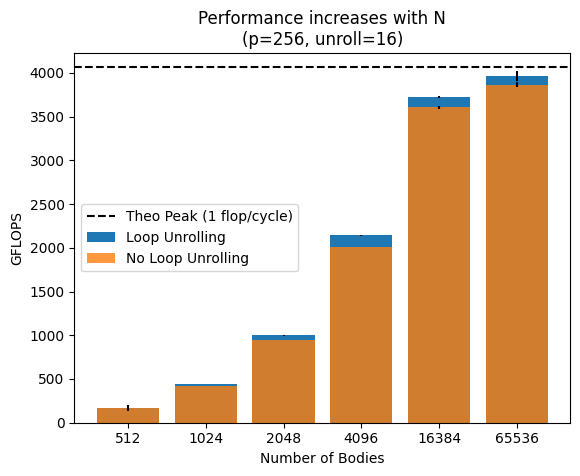

In [18]:
n_bod = np.array(no_roll_m.index)
plt.bar(np.arange(6), yes_roll_m['gflops'], yerr=yes_roll_s['gflops'], label='Loop Unrolling', align='center')
plt.bar(np.arange(6), no_roll_m['gflops'], yerr=no_roll_s['gflops'], label='No Loop Unrolling', align='center', alpha = 0.8)

plt.axhline(4070.5, color='k', linestyle='--', label='Theo Peak (1 flop/cycle)')

plt.xticks(np.arange(6), n_bod)
plt.xlabel('Number of Bodies')
plt.ylabel('GFLOPS')
plt.title('Performance increases with N\n(p=256, unroll=16)')
plt.legend()

# PERFORMANCE INCREASES AS BLOCK SIZE VARIES (unroll=16)

In [19]:
block_df = pd.read_csv('../data/block_size.csv')

In [20]:
block1024_m = block_df[block_df['n_bodies'] == 1024].filter(['p', 'gflops']).groupby(['p']).mean()
block1024_s = block_df[block_df['n_bodies'] == 1024].filter(['p', 'gflops']).groupby(['p']).std()

block4096_m = block_df[block_df['n_bodies'] == 4096].filter(['p', 'gflops']).groupby(['p']).mean()
block4096_s = block_df[block_df['n_bodies'] == 4096].filter(['p', 'gflops']).groupby(['p']).std()

block16384_m = block_df[block_df['n_bodies'] == 16384].filter(['p', 'gflops']).groupby(['p']).mean()
block16384_s = block_df[block_df['n_bodies'] == 16384].filter(['p', 'gflops']).groupby(['p']).std()

block65536_m = block_df[block_df['n_bodies'] == 65536].filter(['p', 'gflops']).groupby(['p']).mean()
block65536_s = block_df[block_df['n_bodies'] == 65536].filter(['p', 'gflops']).groupby(['p']).std()

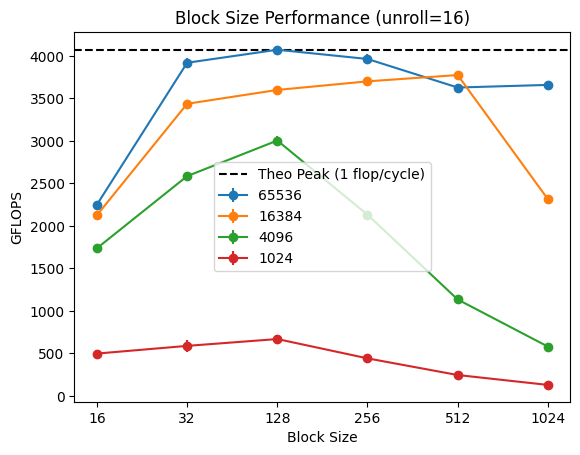

In [21]:
ticks = np.array(block1024_m.index)
plt.errorbar(np.arange(6), block65536_m['gflops'], yerr=block65536_s['gflops'], fmt='-o', label='65536')
plt.errorbar(np.arange(6), block16384_m['gflops'], yerr=block16384_s['gflops'], fmt='-o', label='16384')
plt.errorbar(np.arange(6), block4096_m['gflops'], yerr=block4096_s['gflops'], fmt='-o', label='4096')
plt.errorbar(np.arange(6), block1024_m['gflops'], yerr=block1024_s['gflops'], fmt='-o', label='1024')

plt.axhline(4070.5, color='k', linestyle='--', label='Theo Peak (1 flop/cycle)')
plt.xticks(np.arange(6), ticks)
plt.xlabel('Block Size')
plt.ylabel('GFLOPS')
plt.title('Block Size Performance (unroll=16)')
plt.legend()

plt.show()

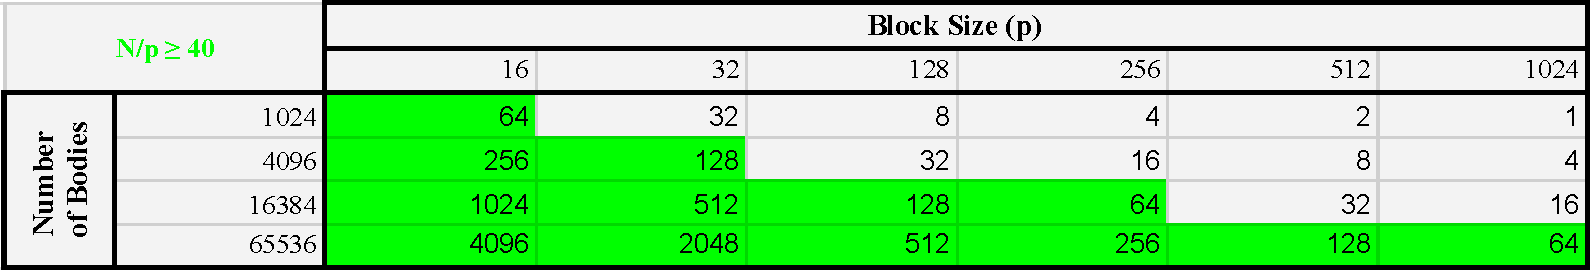

In [22]:
Image.open('./N_over_p_table.png')  

# CALCULATION TIME FOR 1000 STEPS (p=128, unroll=16)

The benchmark on serial code for N=16384, 65536 was run just 1 time, instead of 10, because it took to much time.

In [23]:
time_df = pd.read_csv('../data/timer.csv')
timer_serial_df = pd.read_csv('../data/serial_timer.csv')
timer_serialsym_df = pd.read_csv('../data/serial_sym_timer.csv')

In [24]:
time_m = time_df.filter(['n_bodies', 'time']).groupby('n_bodies').mean()
time_s = time_df.filter(['n_bodies', 'time']).groupby('n_bodies').std()

time_serial_m = timer_serial_df.filter(['n_bodies', 'time']).groupby('n_bodies').mean()
time_serial_s = timer_serial_df.filter(['n_bodies', 'time']).groupby('n_bodies').std()

time_serialsys_m = timer_serialsym_df.filter(['n_bodies', 'time']).groupby('n_bodies').mean()
time_serialsys_s = timer_serialsym_df.filter(['n_bodies', 'time']).groupby('n_bodies').std()

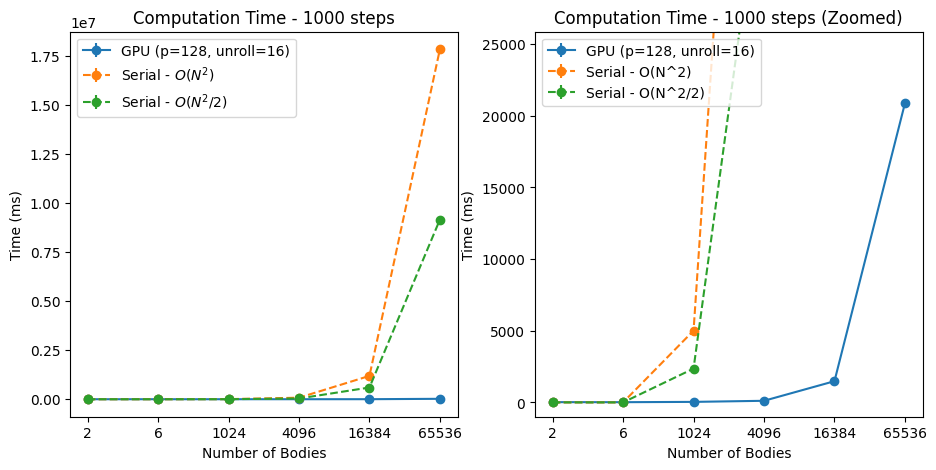

In [25]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
t_bod = np.array(time_m.index)

ax[0].errorbar(np.arange(6), time_m['time'], yerr=time_s['time'], fmt='-o', label='GPU (p=128, unroll=16)')
ax[0].errorbar(np.arange(6), time_serial_m['time'], yerr=time_serial_s['time'], fmt='--o', label=r'Serial - $O(N^2)$')
ax[0].errorbar(np.arange(6), time_serialsys_m['time'], yerr=time_serialsys_s['time'], fmt='--o', label=r'Serial - $O(N^2/2)$')
ax[0].set_xlabel('Number of Bodies')
ax[0].set_ylabel('Time (ms)')
ax[0].set_title('Computation Time - 1000 steps')
ax[0].set_xticks(np.arange(6), t_bod)
ax[0].legend(loc='upper left')
# ax[0].set_yscale('log')

ax[1].errorbar(np.arange(6), time_m['time'], yerr=time_s['time'], fmt='-o', label='GPU (p=128, unroll=16)')
ax[1].errorbar(np.arange(6), time_serial_m['time'], yerr=time_serial_s['time'], fmt='--o', label='Serial - O(N^2)')
ax[1].errorbar(np.arange(6), time_serialsys_m['time'], yerr=time_serialsys_s['time'], fmt='--o', label='Serial - O(N^2/2)')
ax[1].set_xlabel('Number of Bodies')
ax[1].set_ylabel('Time (ms)')
ax[1].set_title('Computation Time - 1000 steps (Zoomed)')
ax[1].set_xticks(np.arange(6), t_bod)
ax[1].legend(loc='upper left')
ax[1].set_ylim(-1000, time_m['time'].max()+5000)
# ax[1].set_yscale('log')


plt.show()

In [26]:
print("GPU mean\n", time_m)
print("\nCPU mean\n", time_serial_m)
print("\nCPU symmetry mean\n",time_serialsys_m)

GPU mean
                 time
n_bodies            
2            16.1860
6            13.9888
1024         35.2520
4096        111.5181
16384      1479.0722
65536     20861.3141

CPU mean
                   time
n_bodies              
2         4.580000e-02
6         3.294000e-01
1024      5.005932e+03
4096      7.807602e+04
16384     1.188026e+06
65536     1.782038e+07

CPU symmetry mean
                   time
n_bodies              
2         3.530000e-02
6         1.237000e-01
1024      2.357080e+03
4096      3.841654e+04
16384     5.967724e+05
65536     9.146450e+06


In [27]:
print("GPU std\n", time_s)
print("\nCPU std\n", time_serial_s)
print("\nCPU symmetry std\n",time_serialsys_s)

GPU std
                 time
n_bodies            
2           5.602036
6           2.037086
1024       12.058765
4096        1.045053
16384       7.423728
65536     260.378180

CPU std
                 time
n_bodies            
2           0.002201
6           0.113740
1024       85.042771
4096      897.672839
16384            NaN
65536            NaN

CPU symmetry std
                 time
n_bodies            
2           0.000483
6           0.002163
1024       32.021323
4096      769.547754
16384            NaN
65536            NaN
